# **Load Data** 

In [1]:
import numpy as np
import pandas as pd
import os
from pandas import read_csv

data = read_csv('/kaggle/input/austinhousingprices/austinHousingData.csv', delimiter = ',')

# **Visualize Data** 

In [2]:
data.head() #get description of values

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [3]:
data.info() #to see data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [4]:
data["numOfStories"].value_counts() #to see data range

numOfStories
1    8268
2    6723
3     174
4       6
Name: count, dtype: int64

In [5]:
data.describe() #to see statistical info

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


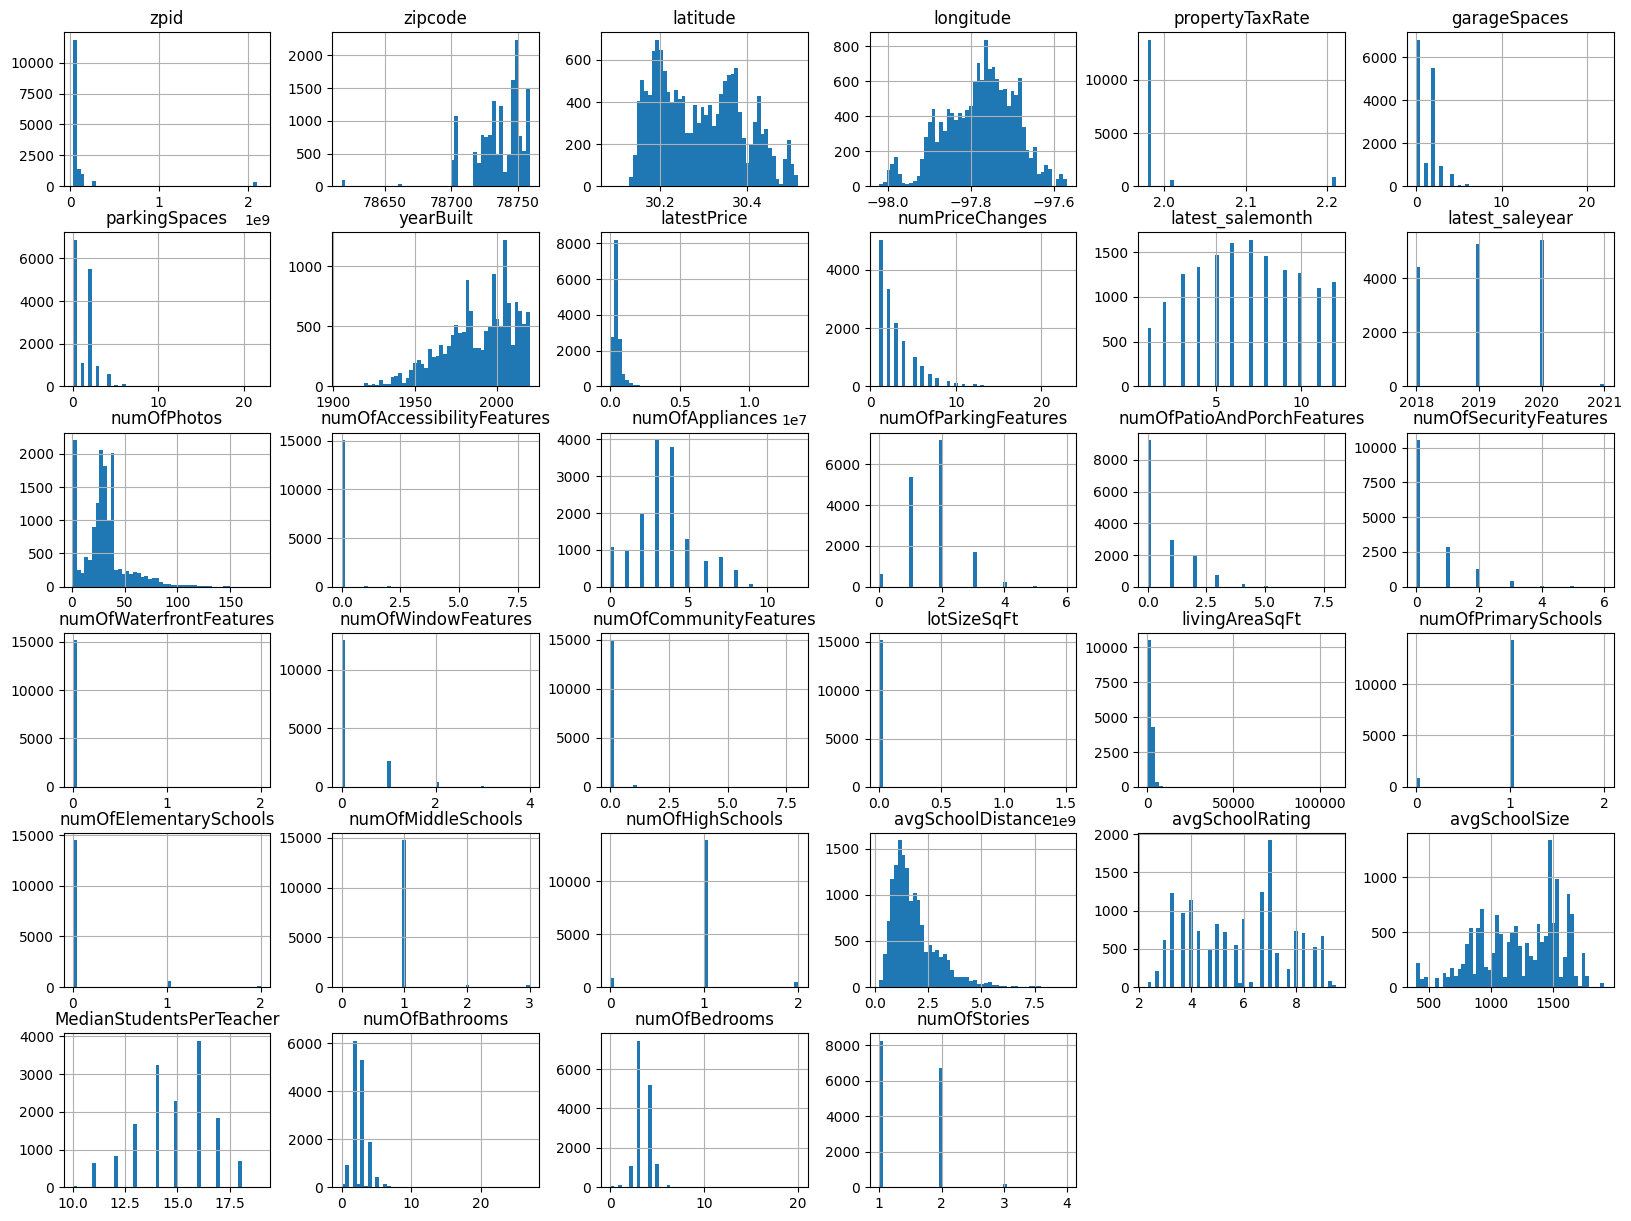

In [6]:
#plotting 50 bin histograms for each feature
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

# **Train Test Split** 

In [7]:
from sklearn.model_selection import train_test_split

#normal train test split
train_set, test_set = train_test_split(data, test_size = 0.2)
print(len(train_set))
print(len(test_set))

12136
3035


In [8]:
test_set.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
10876,58302352,austin,1421 Payton Falls Dr,78754,"1421 Payton Falls Dr, Austin, TX 78754 is a si...",30.373711,-97.660461,1.98,2,True,...,1,2,4.133333,4.333333,1066,12,2.0,4,1,58302352_769a788e316938b11bf1b678ba417b0f-p_f.jpg
2180,145656742,austin,7108 Ondantra Bnd,78744,"Beautiful, well cared for home w/ great curb a...",30.162703,-97.729362,1.98,2,True,...,1,1,3.200000,3.666667,1532,12,3.0,3,2,145656742_534a72b89b58292da7579b161f317d02-p_f...
2837,29432309,austin,10607 Parkfield Dr,78758,Single story home/3 sides brick for easy maint...,30.379349,-97.698677,1.98,0,False,...,1,1,1.233333,4.333333,983,14,2.0,3,1,29432309_1a22332b8df416af00f750de8b690f9f-p_f.jpg
3555,29432219,austin,10200 Parkfield Dr,78758,Live here and get anywhere quickly! Fantastic ...,30.375559,-97.700874,1.98,4,False,...,1,1,1.000000,3.666667,1002,14,3.0,4,1,29432219_0aaa41a15a281b246c39340e3b620e83-p_f.jpg
14421,29338736,austin,2706 Pecos St,78703,Mid-century modern gem in a coveted area of Ta...,30.307184,-97.769646,1.98,0,False,...,1,1,1.266667,7.000000,1298,16,3.0,3,1,29338736_c9c672c5cb6006d2bc15c1633cc81831-p_f.jpg


# **Categorize Living Area Feature** 

In [9]:
#Split feature into bins for practice (not really needed)
bins = [0, 1000, 2000, 3000, 4000, np.inf]
labels = ['Small', 'Medium', 'Large', 'Very Large', 'Luxury']
data['livingArea_category'] = pd.cut(data['livingAreaSqFt'],
                                    bins = bins,
                                    labels = [1, 2, 3, 4, 5])

In [10]:
print(data['livingArea_category'].value_counts()) #count amount in each bin

livingArea_category
2    7055
3    4707
4    1917
5     806
1     686
Name: count, dtype: int64


# **Stratified Train Test Split** 

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

#stratified split is better since distribution of features is even across train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data, data["livingArea_category"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
#percent of data in strat test set
strat_test_set["livingArea_category"].value_counts() / len(strat_test_set)

livingArea_category
2    0.464909
3    0.310379
4    0.126524
5    0.053048
1    0.045140
Name: count, dtype: float64

In [13]:
#almost same as percent data for feature originally
data["livingArea_category"].value_counts() / len(data)

livingArea_category
2    0.465032
3    0.310263
4    0.126360
5    0.053128
1    0.045218
Name: count, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

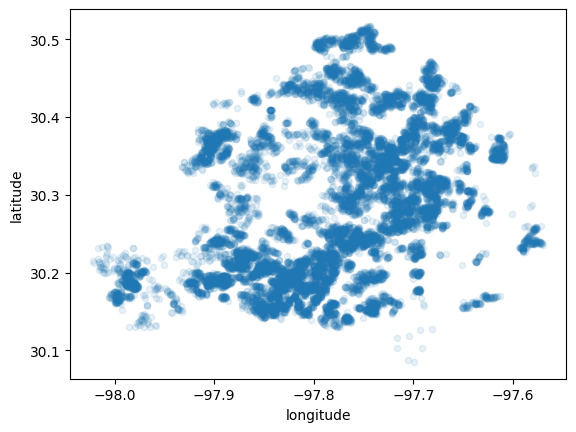

In [14]:
#plot data (should map Austin, Texas)
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

In [15]:
#take out price since y value
housing = strat_train_set.drop("latestPrice", axis = 1)
housing_labels = strat_train_set["latestPrice"].copy()

In [16]:
#make sure no nulls (note which ones have null in them for now)
incomplete_rows = housing[housing.isnull().any(axis=1)].head()
incomplete_rows

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,livingArea_category
14310,29348314,austin,5842 Westslope Dr,78731,NaN,30.345671,-97.784264,1.98,2,True,...,1,2.733333,7.000000,1177,16,6.0,4,3,29348314_b76052aa263d9978331f0e3d17c04ba6-p_f.jpg,5
13491,58316504,austin,6617 Back Bay Ln,78739,NaN,30.189535,-97.897896,1.98,2,True,...,1,1.533333,8.666667,1664,18,3.0,4,2,58316504_e47aa35651fff0209cda3ee1c0d0c126-p_f.jpg,3


# **Heat Map** 

In [17]:
from folium.plugins import HeatMap, MarkerCluster
import folium

def plot_houses_heatmap(df, lat_col='latitude', lon_col='longitude', price_col='latestPrice'):
    """
    Plots houses on a simplified map of Austin using folium with a heatmap.

    Parameters:
        df (pd.DataFrame): DataFrame containing house information with latitude, longitude, and price columns.
        lat_col (str): Column name for latitude.
        lon_col (str): Column name for longitude.
        price_col (str): Column name for the price of the house.
    
    Returns:
        folium.Map: A simplified map with a heatmap layer.
    """
    #center of Austin
    austin_center = [30.2672, -97.7431]
    
    #initialize
    house_map = folium.Map(location=austin_center, zoom_start=11)
    
    #use lat and longitude
    heat_data = df[[lat_col, lon_col]].values.tolist()
    
    #heatmap creation
    HeatMap(heat_data, radius=8, blur=12, max_zoom=1).add_to(house_map)
    
    return house_map

plot_houses_heatmap(data, lat_col='latitude', lon_col='longitude', price_col='latestPrice')

# **Drop All Non-Numerical Data** 

In [18]:
#drop all data that said object in .info() from before since not numerical
to_drop = ['city', 'streetAddress', 'description', 'homeType', 'latest_saledate', 'latestPriceSource', 'homeImage', 'livingArea_category']
housing_num = housing.drop(to_drop, axis=1)

In [19]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12136 entries, 9562 to 2642
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        12136 non-null  int64  
 1   zipcode                     12136 non-null  int64  
 2   latitude                    12136 non-null  float64
 3   longitude                   12136 non-null  float64
 4   propertyTaxRate             12136 non-null  float64
 5   garageSpaces                12136 non-null  int64  
 6   hasAssociation              12136 non-null  bool   
 7   hasCooling                  12136 non-null  bool   
 8   hasGarage                   12136 non-null  bool   
 9   hasHeating                  12136 non-null  bool   
 10  hasSpa                      12136 non-null  bool   
 11  hasView                     12136 non-null  bool   
 12  parkingSpaces               12136 non-null  int64  
 13  yearBuilt                   12136 

# **Median Imputer** 

In [20]:
#we change all the null values to the median of the dataset since we don't want to lose data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [21]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_

array([ 2.94940645e+07,  7.87390000e+04,  3.02847395e+01, -9.77695770e+01,
        1.98000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.99300000e+03,  2.00000000e+00,  7.00000000e+00,
        2.01900000e+03,  2.90000000e+01,  0.00000000e+00,  3.00000000e+00,
        2.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.23200000e+03,  1.97600000e+03,
        1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.56666667e+00,  5.77869409e+00,  1.28700000e+03,  1.50000000e+01,
        3.00000000e+00,  3.00000000e+00,  1.00000000e+00])

In [23]:
housing_num.median().values

array([ 2.94940645e+07,  7.87390000e+04,  3.02847395e+01, -9.77695770e+01,
        1.98000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.99300000e+03,  2.00000000e+00,  7.00000000e+00,
        2.01900000e+03,  2.90000000e+01,  0.00000000e+00,  3.00000000e+00,
        2.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.23200000e+03,  1.97600000e+03,
        1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.56666667e+00,  5.77869409e+00,  1.28700000e+03,  1.50000000e+01,
        3.00000000e+00,  3.00000000e+00,  1.00000000e+00])

In [24]:
X = imputer.transform(housing_num)

# **Testing Median Imputer** 

In [25]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index = housing_num.index)

In [26]:
housing_tr.loc[incomplete_rows.index.values]

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
14310,29348314.0,78731.0,30.345671,-97.784264,1.98,2.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,2.733333,7.000000,1177.0,16.0,6.0,4.0,3.0
13491,58316504.0,78739.0,30.189535,-97.897896,1.98,2.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.533333,8.666667,1664.0,18.0,3.0,4.0,2.0


In [27]:
housing_tr.head()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
9562,29392141.0,78722.0,30.283686,-97.711975,1.98,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.333333,6.666667,1057.0,15.0,1.0,2.0,1.0
14386,58297777.0,78731.0,30.314877,-97.768974,1.98,3.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.666667,7.000000,1298.0,16.0,5.0,4.0,1.0
4804,83825892.0,78739.0,30.200600,-97.917152,1.98,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,2.066667,8.666667,1664.0,18.0,4.0,4.0,2.0
12816,29501798.0,78739.0,30.193441,-97.880859,1.98,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.033333,9.000000,1755.0,18.0,4.0,4.0,2.0
5539,29467758.0,78744.0,30.192232,-97.742462,1.98,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.666667,3.666667,1287.0,14.0,2.0,3.0,1.0


# **One Hot Encoder** 

In [28]:
#one hot encoding allows us to change non numerical data to numerical for important features
housing_cat = housing[['city', 'homeType', 'livingArea_category']
]
housing_cat.head(10)

,city,homeType,livingArea_category
9562,austin,Single Family,1
14386,austin,Single Family,5
4804,austin,Single Family,4
12816,austin,Single Family,4
5539,austin,Single Family,2
12041,austin,Single Family,2
9709,austin,Single Family,3
11607,austin,Single Family,2
11515,austin,Single Family,2
958,austin,Single Family,5


In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0., 7., 0.],
       [0., 7., 4.],
       [0., 7., 3.],
       [0., 7., 3.],
       [0., 7., 1.],
       [0., 7., 1.],
       [0., 7., 2.],
       [0., 7., 1.],
       [0., 7., 1.],
       [0., 7., 4.]])

In [30]:
ordinal_encoder.categories_

[array(['austin', 'del valle', 'driftwood', 'dripping springs', 'manchaca',
        'manor', 'pflugerville', 'road', 'west lake hills'], dtype=object),
 array(['Apartment', 'Condo', 'Mobile / Manufactured', 'MultiFamily',
        'Multiple Occupancy', 'Other', 'Residential', 'Single Family',
        'Townhouse', 'Vacant Land'], dtype=object),
 array([1, 2, 3, 4, 5])]

# **Testing One Hot Encoder** 

In [31]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<12136x24 sparse matrix of type '<class 'numpy.float64'>'
	with 36408 stored elements in Compressed Sparse Row format>

In [32]:
housing_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [33]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12136 entries, 9562 to 2642
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        12136 non-null  float64
 1   zipcode                     12136 non-null  float64
 2   latitude                    12136 non-null  float64
 3   longitude                   12136 non-null  float64
 4   propertyTaxRate             12136 non-null  float64
 5   garageSpaces                12136 non-null  float64
 6   hasAssociation              12136 non-null  float64
 7   hasCooling                  12136 non-null  float64
 8   hasGarage                   12136 non-null  float64
 9   hasHeating                  12136 non-null  float64
 10  hasSpa                      12136 non-null  float64
 11  hasView                     12136 non-null  float64
 12  parkingSpaces               12136 non-null  float64
 13  yearBuilt                   12136 

In [34]:
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12136 entries, 9562 to 2642
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   city                 12136 non-null  object  
 1   homeType             12136 non-null  object  
 2   livingArea_category  12136 non-null  category
dtypes: category(1), object(2)
memory usage: 554.5+ KB


In [35]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12136 entries, 9562 to 2642
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        12136 non-null  int64  
 1   zipcode                     12136 non-null  int64  
 2   latitude                    12136 non-null  float64
 3   longitude                   12136 non-null  float64
 4   propertyTaxRate             12136 non-null  float64
 5   garageSpaces                12136 non-null  int64  
 6   hasAssociation              12136 non-null  bool   
 7   hasCooling                  12136 non-null  bool   
 8   hasGarage                   12136 non-null  bool   
 9   hasHeating                  12136 non-null  bool   
 10  hasSpa                      12136 non-null  bool   
 11  hasView                     12136 non-null  bool   
 12  parkingSpaces               12136 non-null  int64  
 13  yearBuilt                   12136 

# **Attributes Adder** 

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

#column indexes
bedrooms_ix, bathrooms_ix, stories_ix = 37, 36, 38

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #to avoid division by 0
        bedrooms_safe = np.where(X[:, bedrooms_ix] == 0, 1e-10, X[:, bedrooms_ix])
        stories_safe = np.where(X[:, stories_ix] == 0, 1e-10, X[:, stories_ix])

        #new feature: bathrooms per bedroom
        bathrooms_per_bedroom = X[:, bathrooms_ix] / bedrooms_safe

        #new feature: bedrooms per story
        bedrooms_per_story = X[:, bedrooms_ix] / stories_safe

        #concatinate
        return np.c_[X, bathrooms_per_bedroom, bedrooms_per_story]

attr_adder = CombinedAttributesAdder()

housing_extra_attribs = attr_adder.transform(housing.values)

print("Original dataset shape:", housing.values.shape)
print("Transformed dataset shape:", housing_extra_attribs.shape)


Original dataset shape: (12136, 47)
Transformed dataset shape: (12136, 49)


# **Testing Attributes Adder** 

In [37]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["bathrooms_per_bedroom", "bedrooms_per_story"],
    index=housing.index)
housing_extra_attribs.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,livingArea_category,bathrooms_per_bedroom,bedrooms_per_story
9562,29392141,austin,2801 E 22nd St,78722,Light & Bright Bungalow Lovingly Restored to R...,30.283686,-97.711975,1.98,0,False,...,6.666667,1057,15,1.0,2,1,29392141_52f6ff8f958996ce834e298099955d2e-p_f.jpg,1,1.0,0.75
14386,58297777,austin,3300 Foothill Dr,78731,Exceptional 1 story home on .61 acres w/ prist...,30.314877,-97.768974,1.98,3,False,...,7.0,1298,16,5.0,4,1,58297777_3ed6da95207692be042528ad6c8a23d8-p_f.jpg,5,1.0,0.6
4804,83825892,austin,8100 Via Verde Dr,78739,Updated and move-in ready and just a short wal...,30.2006,-97.917152,1.98,0,True,...,8.666667,1664,18,4.0,4,2,83825892_a2ead03d2a33986622b4d2eaf6220a34-p_f.jpg,4,1.0,0.483871
12816,29501798,austin,10213 Rhett Butler Dr,78739,Well maintained home. Master down with large b...,30.193441,-97.880859,1.98,0,True,...,9.0,1755,18,4.0,4,2,29501798_d1582bdc3c92c0ba1f9bca4d0333724d-p_f.jpg,4,1.0,0.967742
5539,29467758,austin,4913 Cabob St,78744,Another exceptional Castle Hill contemporary t...,30.192232,-97.742462,1.98,0,False,...,3.666667,1287,14,2.0,3,1,29467758_1839d57381f9881f6d3c72f4bca9b0b2-p_f.jpg,2,1.0,0.6


# **Z-Score Normalization** 

In [38]:
#Z score normalization
#Z score normalization works by calculating the mean (mu) and standard deviation 
#it then subtracts the original data point with the mean and divides the result by the standard deviation
def zscore_normalization_features(features):
    mu_j = np.mean(features, axis=0)
    sigma_j = np.std(features, axis=0)
    X_norm = (features-mu_j)/sigma_j
    return X_norm, mu_j, sigma_j

#normalize using helper function
X_norm, X_mu, X_sigma = zscore_normalization_features(housing_num)

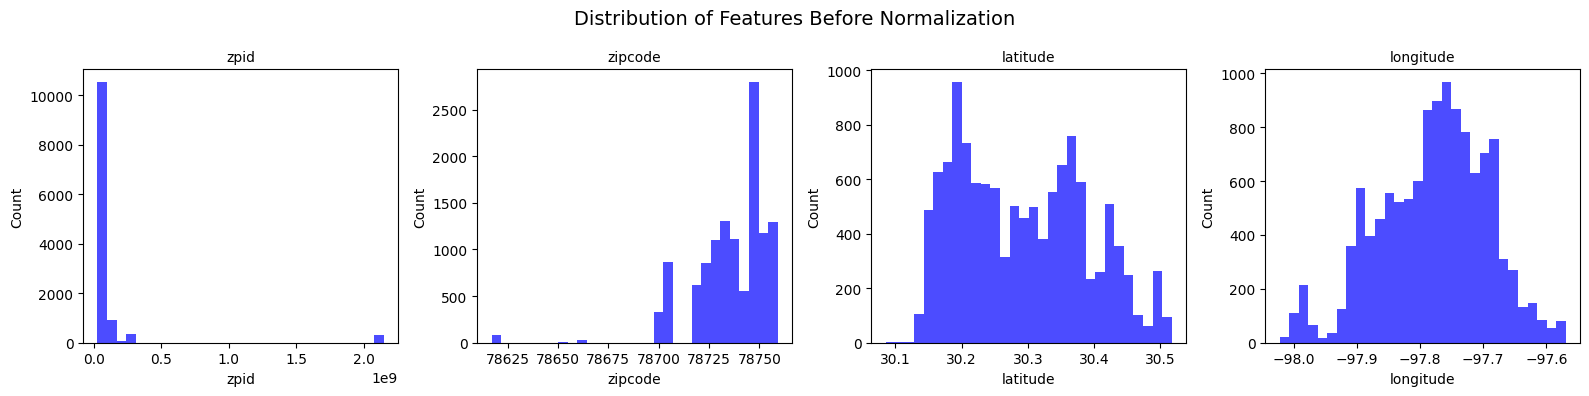

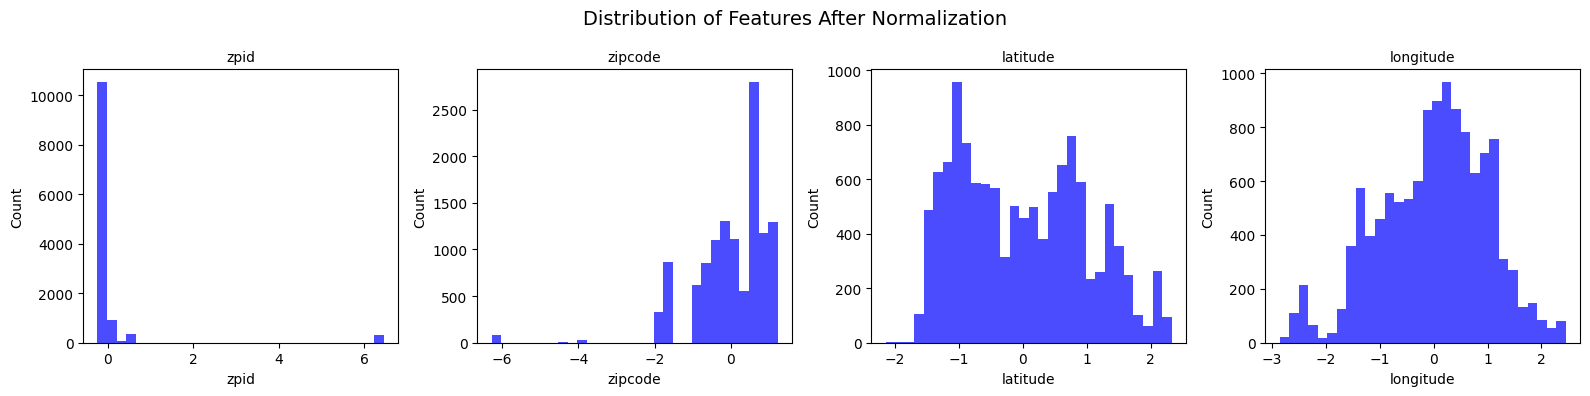

In [39]:
import matplotlib.pyplot as plt

#helper function to plot the features
def plot_distribution(ax, data, feature_name):
    """Helper function to plot the distribution."""
    ax.hist(data, bins=30, color='blue', alpha=0.7)  
    ax.set_title(feature_name, fontsize=10)         
    ax.set_xlabel(feature_name)                     
    ax.set_ylabel("Count")                          

#distribution before normalization
fig, ax = plt.subplots(1, 4, figsize=(16, 4)) #only doing 4 features for now
for i in range(len(ax)):
    plot_distribution(ax[i], housing_num.iloc[:, i], housing_num.columns[i]) #iloc for index location
fig.suptitle("Distribution of Features Before Normalization", fontsize=14)
plt.tight_layout() #prevents overlap?
plt.show()

#distribution after normalization (similar code)
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(len(ax)):
    plot_distribution(ax[i], X_norm.iloc[:, i], housing_num.columns[i])
fig.suptitle("Distribution of Features After Normalization", fontsize=14)
plt.tight_layout()
plt.show()


# **Constructing Pipeline**

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#combine the imputer, attributes adder, and scaler into a pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
housing_num_tr

array([[-0.23581762, -0.73081194, -0.08619945, ..., -0.89410569,
        -0.02205051, -0.63763202],
       [-0.14449511, -0.25495466,  0.23625741, ..., -0.89410569,
        -0.02205051,  1.58187241],
       [-0.06384331,  0.16802959, -0.94515765, ...,  1.01256566,
        -0.02205051, -0.63763202],
       ...,
       [-0.06288319,  0.06228352, -0.94095761, ...,  1.01256566,
        -0.02205051, -0.08275591],
       [-0.10644068,  0.48526777, -1.04509108, ...,  1.01256566,
        -0.02205051, -1.19250813],
       [-0.23587774, -0.51931982,  1.46081659, ...,  1.01256566,
        -0.02205051, -0.08275591]])

In [42]:
from sklearn.compose import ColumnTransformer

#comine the previous numerical pipeline and now cateogircal pipeline
num_attribs = list(housing_num)
cat_attribs = ['city', 'homeType', 'livingArea_category']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [43]:
housing_prepared.shape

(12136, 65)

In [44]:
#numerical attributes originally
num_attribs = list(housing_num)

extra_attribs = ["bathrooms_per_bedroom", "bedrooms_per_story"]

#seperate
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out(cat_attribs)) #cateogorical

#combine
attributes = num_attribs + extra_attribs + cat_one_hot_attribs


# **Multiple Linear Regression (Without Using Modules)**

In [45]:
#vecotrized approach to get cost
def compute_cost_vectorized(X, y, w, b):
    f_wb = np.dot(X, w) + b #basic fwb function y = X*w + b
    total_cost = np.sum((f_wb - y)**2) #squared error
    return (1/(2*X.shape[0]))*total_cost #finish off the formula (dividing by 2)

#vecotrized approach to get gradient
def compute_gradient_vectorized(X, y, w, b):
    m = X.shape[0] #training examples
    n = X.shape[1] #features
    f_wb = np.dot(X, w) + b #prediction
    error = f_wb - y #subtract from actual prediction to get error
    dj_db = (1/m)*(np.sum(error)) #cost gradient w/ b scalar
    dj_dw = (1/m)*np.dot(X.T, error) #cost gradient w/ w vector
    return dj_db, dj_dw

#run gradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = [] #store at each iteration
    w = copy.deepcopy(w_in) #initilaize weight
    b = b_in #initialize bias

    for i in range(num_iters): #do gradient descent for num iterations
        dj_db, dj_dw = gradient_function(X, y, w, b) #cmopute gradients
        w = w - alpha * dj_dw #update w
        b = b - alpha * dj_db #update b

        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import copy 
import math 

#split into test train
X = housing
y = housing_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#apply pipeline
housing_prepared_new = full_pipeline.fit_transform(X_train)
X_train_prepared = housing_prepared_new  # Already a NumPy array

#scale target y
y_mean = y_train.mean()
y_std = y_train.std()
y_train_scaled = (y_train - y_mean) / y_std

#initializing parameters
initial_w = np.zeros(X_train_prepared.shape[1])
initial_b = 0.0

iterations = 1000
alpha = 1e-3

#running gradient descent
w_final, b_final, J_hist = gradient_descent(
    X_train_prepared, 
    y_train_scaled.values,
    initial_w, 
    initial_b, 
    compute_cost_vectorized, 
    compute_gradient_vectorized, 
    alpha, 
    iterations
)

#need to reverse scaling to calculate how well it did
predictions_scaled = np.dot(X_train_prepared, w_final) + b_final
predictions = predictions_scaled * y_std + y_mean

#outputs
print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final}")

#prediction every 100th
print("\nSample Predictions (every 100th value):")
for i in range(0, X_train_prepared.shape[0], 100):
    print(f"Prediction: {predictions[i]:0.2f}, Target value: {y_train.values[i]}")


Iteration    0: Cost     0.50
Iteration  100: Cost     0.41
Iteration  200: Cost     0.37
Iteration  300: Cost     0.35
Iteration  400: Cost     0.33
Iteration  500: Cost     0.32
Iteration  600: Cost     0.31
Iteration  700: Cost     0.30
Iteration  800: Cost     0.29
Iteration  900: Cost     0.29
b, w found by gradient descent: 0.00, [ 4.53739860e-03 -9.24244251e-02  2.21452620e-02  4.24633559e-04
 -7.10864567e-02  1.40196162e-02 -9.70903627e-02 -1.34461356e-02
 -1.02600163e-02 -1.31082558e-03  4.65391880e-02  2.52094802e-02
  1.37083895e-02 -3.94007210e-02 -1.52954844e-02  8.71006714e-03
  1.71739930e-02  2.68110782e-02  2.96578814e-03 -7.04873185e-03
  1.03584578e-02  2.15409507e-02 -2.96582507e-03  5.04878224e-02
 -1.78606115e-03 -1.30753212e-02  6.25343202e-03  2.50255308e-01
 -2.34122720e-02  3.56460611e-02  8.84773108e-03 -4.33564967e-02
 -2.77051663e-03  6.71161930e-02 -3.12113549e-02  2.95155646e-02
  1.89216360e-01  4.52306716e-02  1.48691150e-02 -3.27313394e-03
  1.44968857

# **Using Sklearn Linear Regression**

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #use linear regression model
lin_reg.fit(housing_prepared, housing_labels) #fit model

LinearRegression()

In [48]:
#select first 5
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

#prediction and labels
print("Predictions:", lin_reg.predict(some_data_prepared))
print("True labels:", list(some_labels))


Predictions: [ 592638.28768382 1835506.40527446  764606.96913282  793480.07865928
  279058.9953048 ]
True labels: [499900.0, 3500000.0, 549900.0, 584900.0, 269900.0]


In [49]:
from sklearn.metrics import mean_squared_error

#calculate mean squared error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

308457.8183121362

# **Sklearn Decision Tree Regressor**

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [52]:
from sklearn.model_selection import cross_val_score
#get cross validation score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) #use 10 cross validations
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [323015.77011241 571323.74224517 467122.62294683 275753.35901014
 253660.27578922 332515.60859579 259608.5397532  268603.99387244
 537840.88018928 297275.38371146]
Mean: 358672.01762259245
Standard deviation: 114296.82186644488


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [270211.61345629 494998.96668603 670311.06983981 304755.86091975
 250432.87175578 315737.49254467 246737.19843613 240765.01443342
 404448.16454804 235186.78843992]
Mean: 343358.50410598464
Standard deviation: 134694.35873378825


# **Sklearn Random Forest Regressor**

In [55]:
#random forest regressor works by averaging results from individual trees
#it trains each tree on a diff sample of data
#this allows reduced overfitting since we avg multiple results

In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42) #create model
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [57]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

103243.30481445718

In [58]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [209316.17610222 403917.83021691 276345.7704794  246411.71507212
 187457.31455868 257992.00028588 174992.51566062 196831.61444789
 389602.81024732 209659.00290231]
Mean: 255252.6749973356
Standard deviation: 77020.60868750357


# **Grid Search & Randomized Search for Feature Selection**

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_ #display the best found parameters

{'max_features': 8, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_ #display the best estimator all together

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

336872.08542744064 {'max_features': 2, 'n_estimators': 3}
297635.7380119833 {'max_features': 2, 'n_estimators': 10}
289278.2283937761 {'max_features': 2, 'n_estimators': 30}
323100.5773770474 {'max_features': 4, 'n_estimators': 3}
289664.2695222855 {'max_features': 4, 'n_estimators': 10}
280960.92417870514 {'max_features': 4, 'n_estimators': 30}
334543.28101170826 {'max_features': 6, 'n_estimators': 3}
289188.2475808252 {'max_features': 6, 'n_estimators': 10}
280711.18598353455 {'max_features': 6, 'n_estimators': 30}
332502.789462789 {'max_features': 8, 'n_estimators': 3}
286971.76187216776 {'max_features': 8, 'n_estimators': 10}
270855.9588705449 {'max_features': 8, 'n_estimators': 30}
346399.59793320316 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
299246.36111622944 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
329403.4540032937 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
299357.3152400073 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a1beb100fa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a1beb102710>},
                   random_state=42, scoring='neg_mean_squared_error')

In [64]:
#see reuslts
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

270906.44004007237 {'max_features': 7, 'n_estimators': 180}
278837.50705940276 {'max_features': 5, 'n_estimators': 15}
285488.47758236714 {'max_features': 3, 'n_estimators': 72}
279358.5758404059 {'max_features': 5, 'n_estimators': 21}
272320.2124736512 {'max_features': 7, 'n_estimators': 122}
285087.92114460736 {'max_features': 3, 'n_estimators': 75}
284663.0459743518 {'max_features': 3, 'n_estimators': 88}
277134.2970647244 {'max_features': 5, 'n_estimators': 100}
284503.4103289548 {'max_features': 3, 'n_estimators': 150}
331226.0847321776 {'max_features': 5, 'n_estimators': 2}


In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.43183451e-02, 3.63007810e-02, 4.93976348e-02, 3.70973194e-02,
       3.67552189e-03, 1.22182592e-02, 1.52837423e-02, 5.45893481e-04,
       2.13787536e-03, 2.82015597e-04, 5.83395467e-03, 3.40686600e-03,
       1.23464350e-02, 3.05717756e-02, 9.93645719e-03, 1.69804828e-02,
       5.03088660e-03, 2.02866571e-02, 4.02645806e-04, 1.45198520e-02,
       5.96968963e-03, 8.91728459e-03, 4.34604625e-03, 1.59222737e-03,
       2.64844423e-03, 1.56356819e-04, 5.95111218e-02, 2.02997541e-01,
       1.81065673e-03, 1.56942238e-03, 1.56129357e-03, 4.31616171e-03,
       2.37894606e-02, 2.46159841e-02, 3.55877555e-02, 1.25220592e-02,
       1.29450010e-01, 2.90470011e-02, 8.80298511e-03, 3.49210924e-05,
       1.81476104e-02, 1.32610408e-03, 1.37230815e-04, 1.13705349e-05,
       2.85242118e-05, 5.76485995e-06, 5.79897625e-07, 1.94730005e-05,
       2.53884172e-06, 1.11646508e-05, 6.93739345e-05, 5.91315051e-04,
       9.06598887e-06, 5.58513358e-06, 1.77967559e-04, 1.57330754e-05,
      

# **Features Ranked**

In [66]:
extra_attribs = ["bathrooms_per_bedroom", "bedrooms_per_story"] #other features we added before
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs #add all together
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20299754050590435, 'livingAreaSqFt'),
 (0.12945000994720218, 'numOfBathrooms'),
 (0.07431834512360176, 'zpid'),
 (0.05951112175885735, 'lotSizeSqFt'),
 (0.04939763479473158, 'latitude'),
 (0.0370973193743334, 'longitude'),
 (0.03630078095759358, 'zipcode'),
 (0.0355877554648227, 'avgSchoolSize'),
 (0.030571775602135236, 'yearBuilt'),
 (0.02904700105439636, 'numOfBedrooms'),
 (0.024615984126950617, 'avgSchoolRating'),
 (0.023789460612367596, 'avgSchoolDistance'),
 (0.02028665712324492, 'numOfPhotos'),
 (0.018147610356111947, 'bedrooms_per_story'),
 (0.016980482795734768, 'latest_salemonth'),
 (0.01528374228599236, 'hasAssociation'),
 (0.014519852018821375, 'numOfAppliances'),
 (0.012522059170870212, 'MedianStudentsPerTeacher'),
 (0.012346435044930913, 'parkingSpaces'),
 (0.012218259216353979, 'garageSpaces'),
 (0.0099364571893506, 'numPriceChanges'),
 (0.008917284589318402, 'numOfPatioAndPorchFeatures'),
 (0.008802985108843905, 'numOfStories'),
 (0.005969689628389354, 'numOfParkingF

# **END PROJECT**